In [1]:
using CSV, Tables
using DelimitedFiles, DataFrames
using Statistics
import PyPlot as plt
using Plots
using GLM
using ShiftedArrays
using PyCall
using PlotlyJS
using FinancialToolbox
using FinancialDerivatives
using RCall
using LsqFit
using BusinessDays, Dates

yf = pyimport("yfinance")

WebIO._IJuliaInit()

PyObject <module 'yfinance' from '/home/aidin/anaconda3/lib/python3.8/site-packages/yfinance/__init__.py'>

In [2]:
K = 100
r = .01
vol = 0.2

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

In [3]:
my_cg = cgrad([:blue, :orange])

ColorGradient(RGBA{Float64}[RGBA{Float64}(0.0,0.0,1.0,1.0), RGBA{Float64}(1.0,0.6470588235294118,0.0,1.0)], [0.0, 1.0])

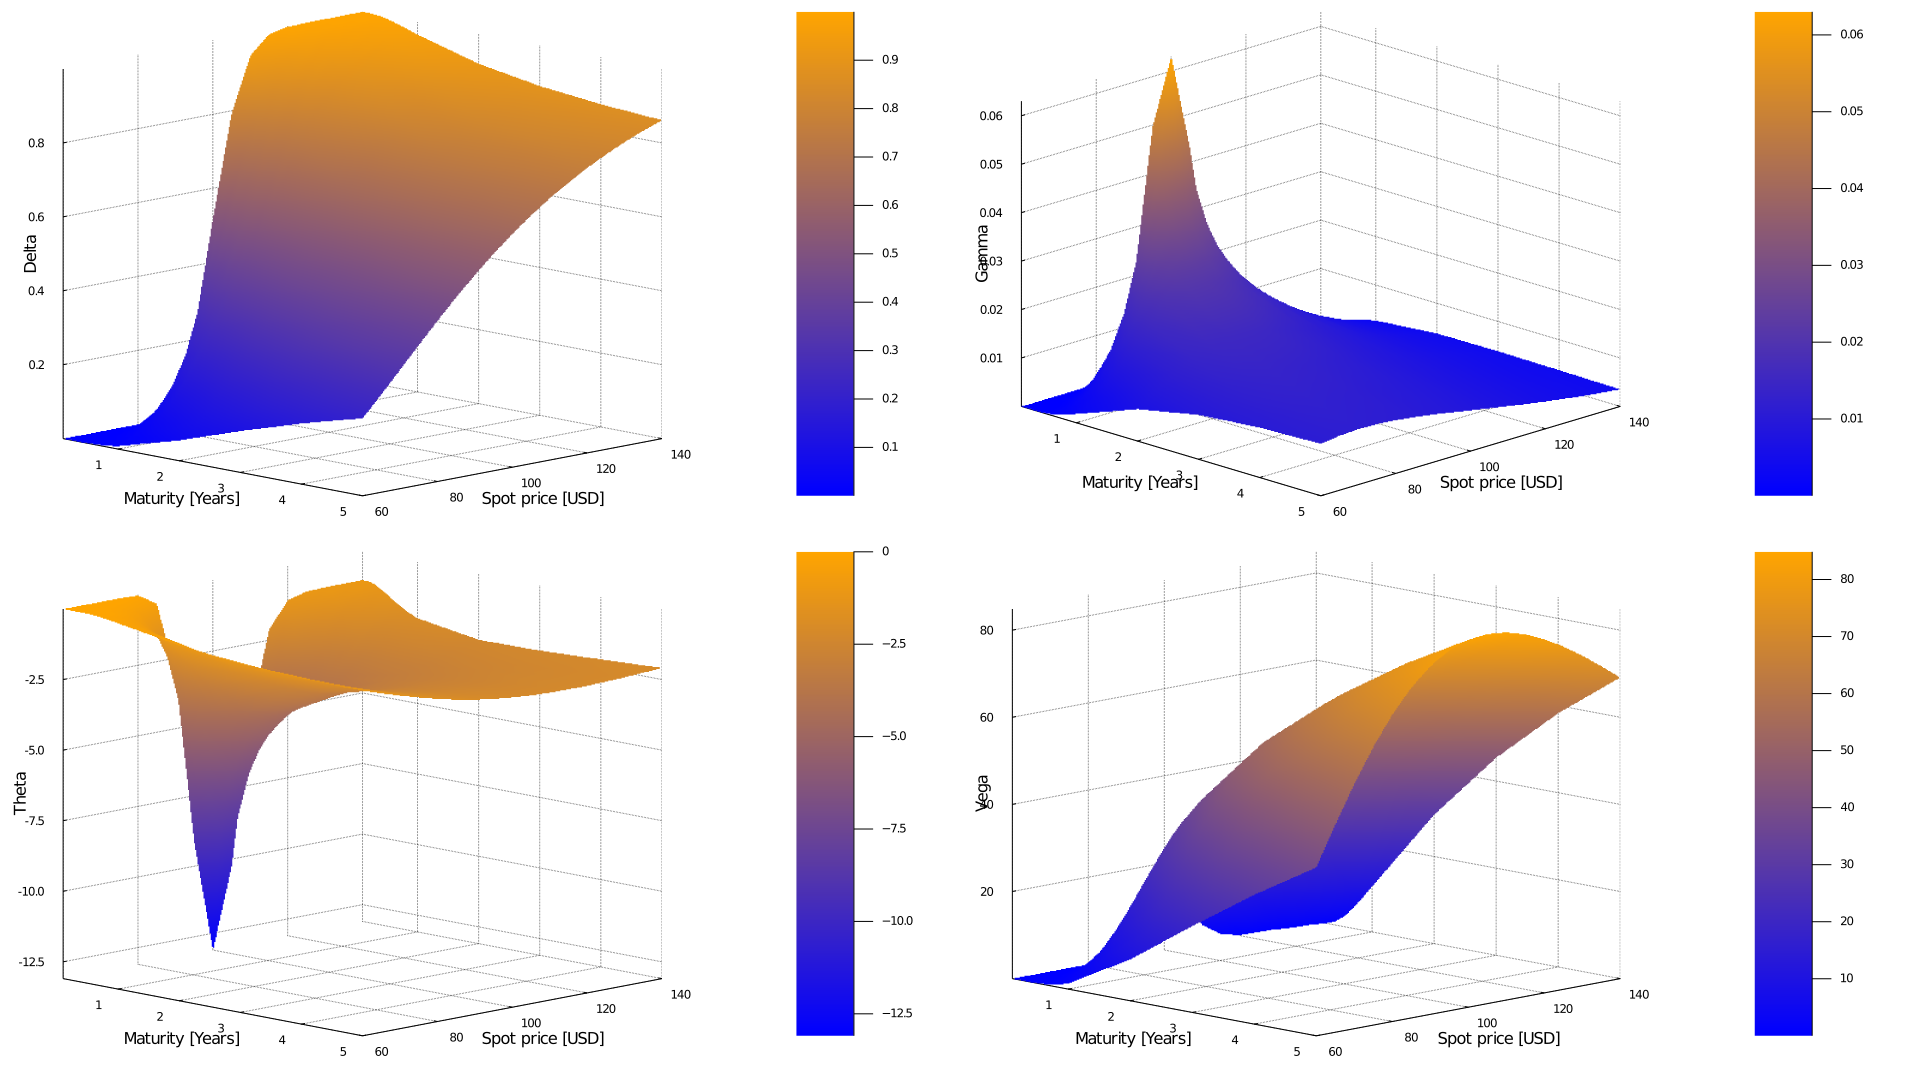

In [4]:
plot_price = Plots.plot(T, S, price,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta = Plots.plot(T, S, delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma = Plots.plot(T, S, gamma,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta = Plots.plot(T, S, theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega  = Plots.plot(T, S, vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv  = Plots.plot(T, S, impv, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta, plot_gamma, plot_theta, plot_vega, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


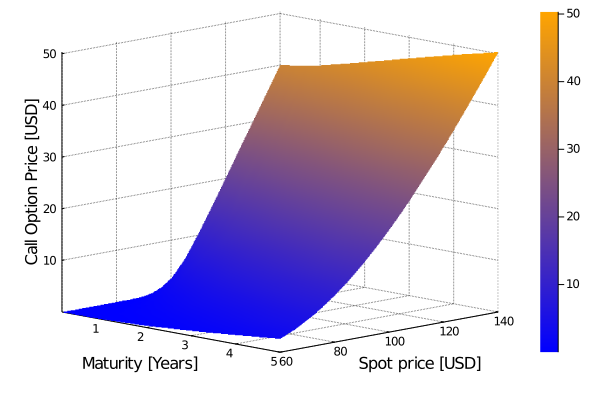

In [5]:
Plots.plot(plot_price)
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [6]:
K = 100
r = .01
vol = 0.75

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

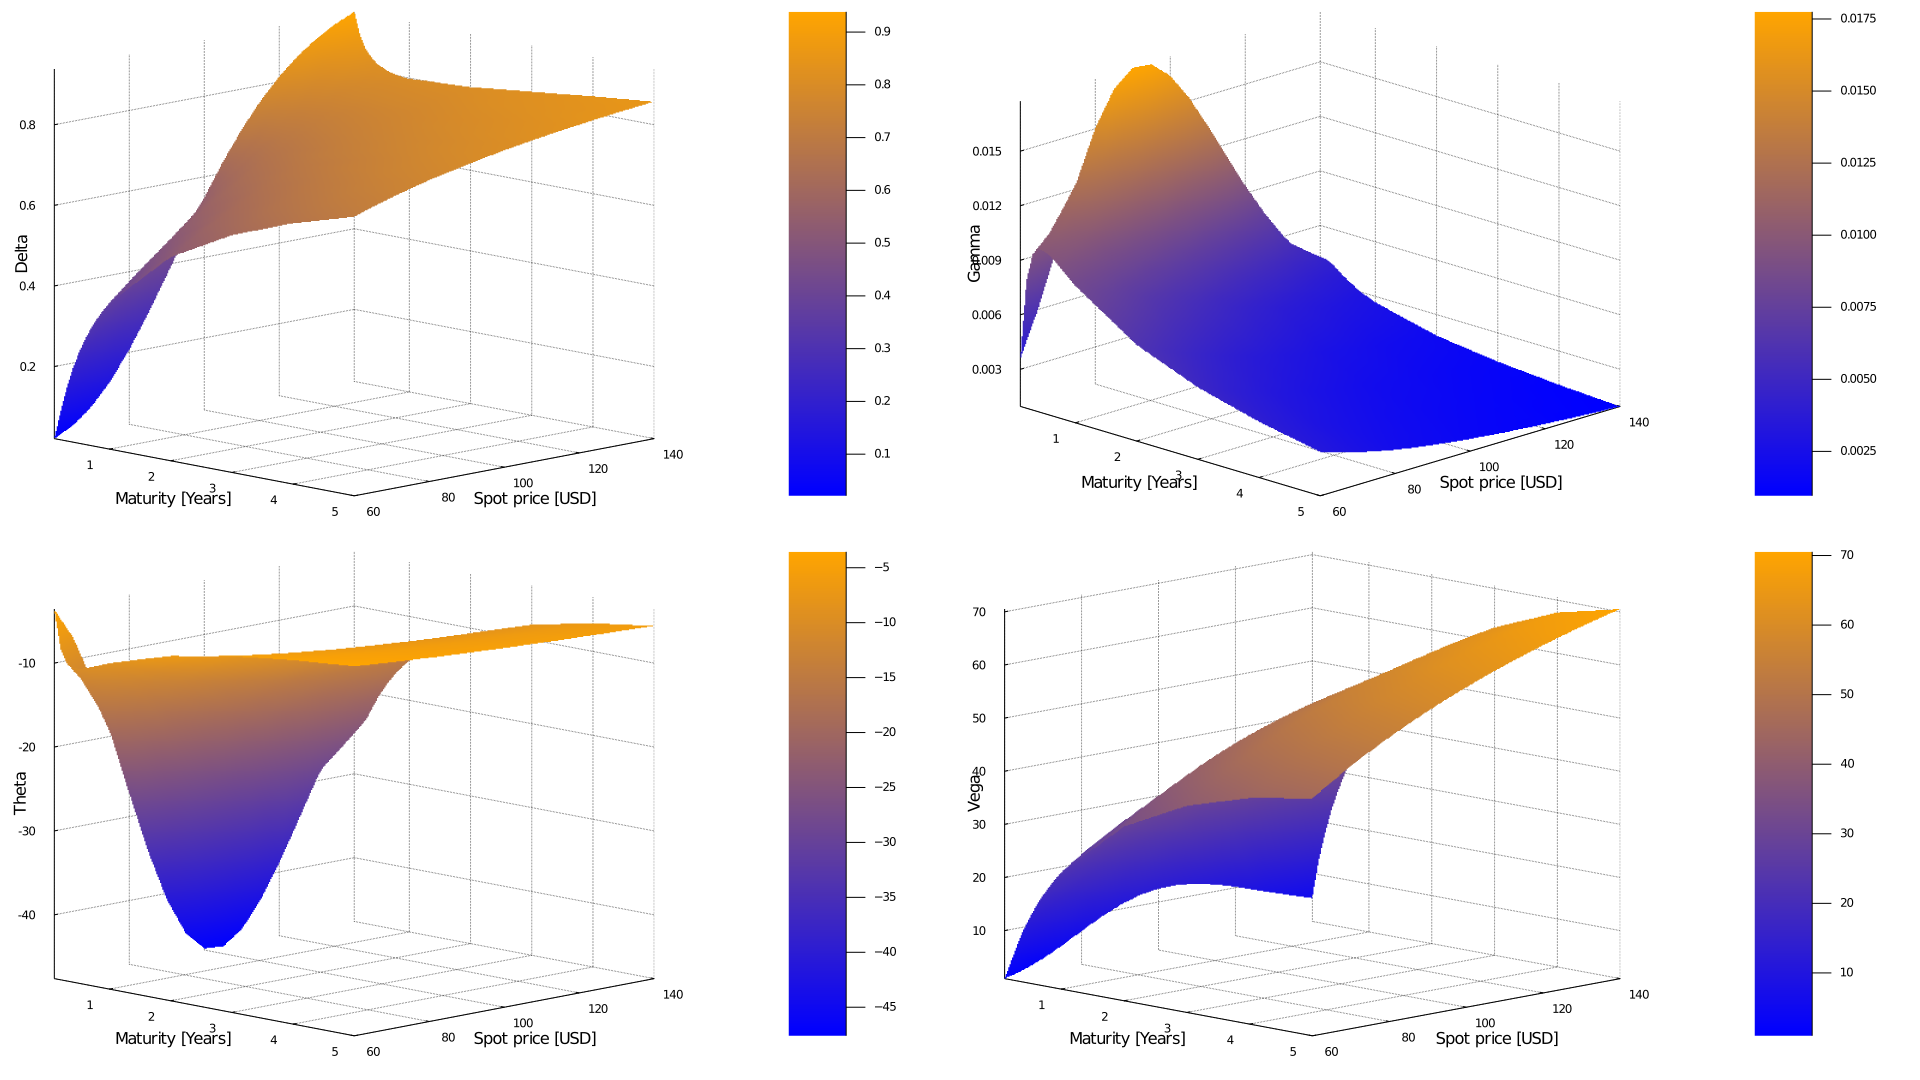

In [7]:
plot_price = Plots.plot(T, S, price,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta = Plots.plot(T, S, delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma = Plots.plot(T, S, gamma,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta = Plots.plot(T, S, theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega  = Plots.plot(T, S, vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv  = Plots.plot(T, S, impv, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta, plot_gamma, plot_theta, plot_vega, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


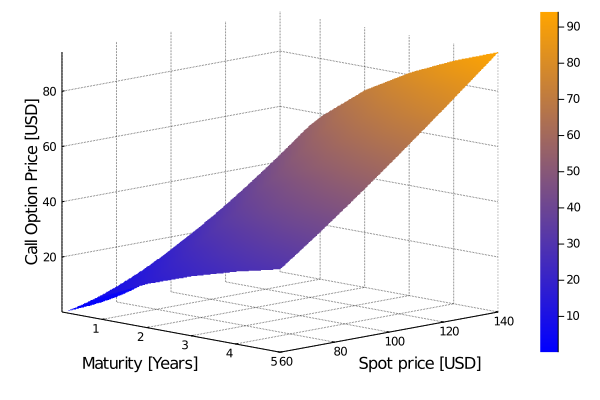

In [8]:
Plots.plot(plot_price)
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [9]:
K = 100
r = .01
vol = 0.05

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
#impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
#    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

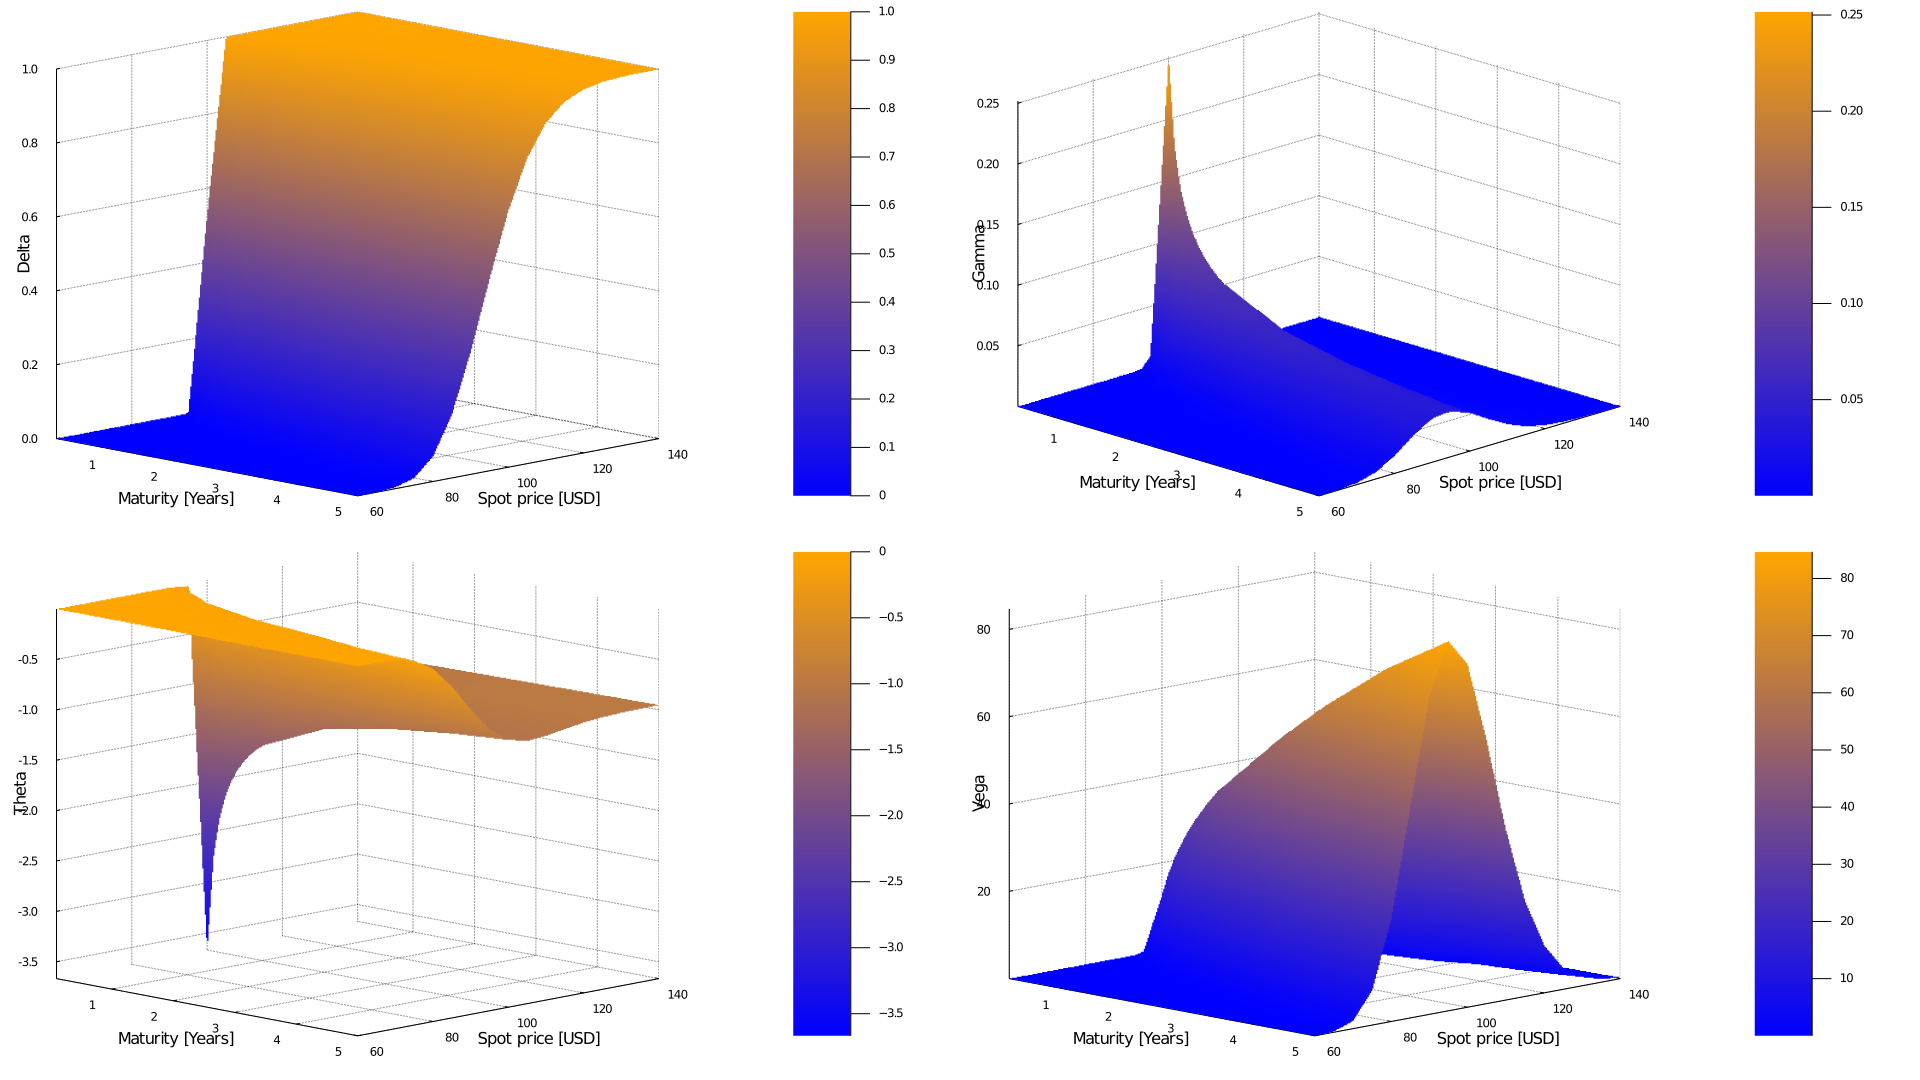

In [10]:
plot_price = Plots.plot(T, S, price,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta = Plots.plot(T, S, delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma = Plots.plot(T, S, gamma,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta = Plots.plot(T, S, theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega  = Plots.plot(T, S, vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv  = Plots.plot(T, S, impv, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta, plot_gamma, plot_theta, plot_vega, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [11]:
STOCK          = DataFrame(CSV.File("DATA/RUT.csv"))

S0             = STOCK.Close[length(STOCK.Close)]

CALL_OVERNIGHT = DataFrame(CSV.File("DATA/CALL_OVERNIGHT.csv"))
CALL_1MONTH    = DataFrame(CSV.File("DATA/CALL_1MONTH.csv"   ))
CALL_2MONTHS   = DataFrame(CSV.File("DATA/CALL_2MONTHS.csv"  ))
CALL_3MONTHS   = DataFrame(CSV.File("DATA/CALL_3MONTHS.csv"  ))
CALL_4MONTHS   = DataFrame(CSV.File("DATA/CALL_4MONTHS.csv"  ))
CALL_5MONTHS   = DataFrame(CSV.File("DATA/CALL_5MONTHS.csv"  ))
CALL_6MONTHS   = DataFrame(CSV.File("DATA/CALL_6MONTHS.csv"  ))
CALL_10MONTHS  = DataFrame(CSV.File("DATA/CALL_10MONTHS.csv" ))

PUT_OVERNIGHT  = DataFrame(CSV.File("DATA/PUT_OVERNIGHT.csv" ))
PUT_1MONTH     = DataFrame(CSV.File("DATA/PUT_1MONTH.csv"    ))
PUT_2MONTHS    = DataFrame(CSV.File("DATA/PUT_2MONTHS.csv"   ))
PUT_3MONTHS    = DataFrame(CSV.File("DATA/PUT_3MONTHS.csv"   ))
PUT_4MONTHS    = DataFrame(CSV.File("DATA/PUT_4MONTHS.csv"   ))
PUT_5MONTHS    = DataFrame(CSV.File("DATA/PUT_5MONTHS.csv"   ))
PUT_6MONTHS    = DataFrame(CSV.File("DATA/PUT_6MONTHS.csv"   ))
PUT_10MONTHS   = DataFrame(CSV.File("DATA/PUT_10MONTHS.csv"  ))

CALLS = [CALL_OVERNIGHT, CALL_1MONTH,  CALL_2MONTHS,
         CALL_3MONTHS,   CALL_4MONTHS, CALL_5MONTHS,
         CALL_6MONTHS,   CALL_10MONTHS]

INTEREST_RATES = [0.32814, 0.45514, 0.96686, 1.47200, 2.12586]

T              = [   1/252,     1/12,   2/12,     3/12,     4/12,     5/12,     6/12,    10/12]
r              = [.0032814, .0045514, .00711, .0096686, .0113524, .0130362, .0147200, .0179893]

8-element Vector{Float64}:
 0.0032814
 0.0045514
 0.00711
 0.0096686
 0.0113524
 0.0130362
 0.01472
 0.0179893

In [12]:
for j in 1:length(CALLS)
    
    if eltype(CALLS[j].Strike) == String
        CALLS[j].Strike = [parse(Float64,replace(CALLS[j].Strike[i], "," => "")) for i in 1:length(CALLS[j].Strike)]
    end
    
    if eltype(CALLS[j].Ask) == String
        tmp = Array{Union{Missing, Float64}}(undef, length(CALLS[j].Ask))
        for k in 1:length(tmp)
            if CALLS[j].Ask[k] == '-'
                tmp[k] = parse(Float64,replace(CALLS[j].Ask[k], "," => ""))
            else
                tmp[k] = missing
            end
        end
        CALLS[j].Ask = tmp
        tmp = nothing
    end
    
    if eltype(CALLS[j].Bid) == String
        tmp = Array{Union{Missing, Float64}}(undef, length(CALLS[j].Bid))
        for k in 1:length(tmp)
            if CALLS[j].Bid[k] == '-'
                tmp[k] = parse(Float64,replace(CALLS[j].Bid[k], "," => ""))
            else
                tmp[k] = missing
            end
        end
        CALLS[j].Bid = tmp
        tmp = nothing
    end
        
    tmp = Array{Float64}(undef, length(CALLS[j]."Implied Volatility"))
    for k in 1:length(CALLS[j]."Implied Volatility")
        tmp[k] = parse(Float64,replace(CALLS[j]."Implied Volatility"[k], "%" => ""))
    end
    CALLS[j]."Implied Volatility" = tmp
end

[0.2888073506606717, 2.685135778890356, -0.3404254432524924, -0.5084658661570147]

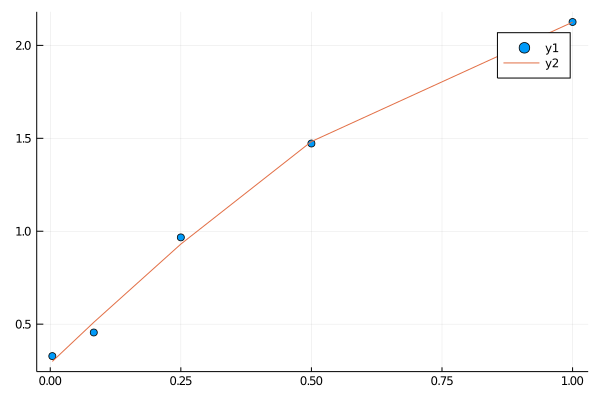

In [96]:
model(t, p) = p[1] .+ p[2] .* t .+ p[3] .* t.^2 .+ p[4] .* t.^3
tdata = [1/252, 1/12, 3/12, 6/12, 1]
ydata = INTEREST_RATES
p0 = [.5, .5, .5, .5]

fit = curve_fit(model, tdata, ydata, p0)
param = fit.param
print(param)

Plots.plot(tdata, ydata, seriestype = :scatter)
Plots.plot!(tdata, model(tdata, param))
#Plots.plot!(T, r*100, seriestype = :scatter)

In [14]:
function Mid_Price( df )
    df[!,:Mid_Price] = ( df.Ask .+ df.Bid ) ./ 2
end

for i in 1:length(CALLS)
    Mid_Price(CALLS[i])
end

In [15]:
impv = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].Strike)) for i in 1:length(CALLS)]
for j in 1:length(CALLS)
    for i in 1:length(CALLS[j].Strike)
        try
            impv[j][i] = blsimpv(S0, CALLS[j].Strike[i], r[j], T[j], CALLS[j].Mid_Price[i])
        catch y
            impv[j][i] = missing
        end
    end
end

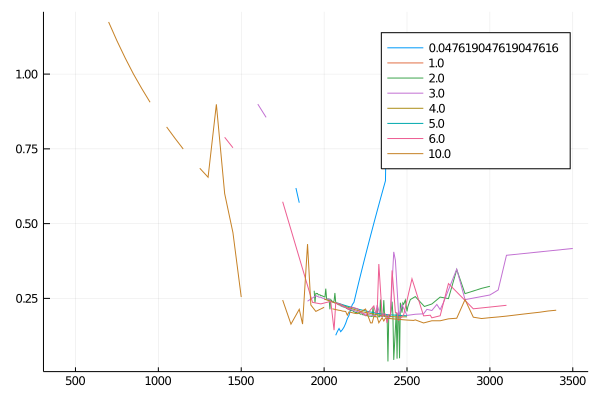

In [16]:
a = Plots.plot(CALLS[1].Strike, replace(impv[1], missing=>NaN), label=string(T[1]*12))
for i in 2:length(CALLS)
    Plots.plot!(CALLS[i].Strike, replace(impv[i], missing=>NaN), label=string(T[i]*12))
end
display(a)

In [17]:
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].Strike)
end
Strikes .= clamp.(Strikes, 1250, 2750) 
Strikes = sort(unique(Strikes))

149-element Vector{Any}:
 1250
 1300.0
 1350.0
 1400.0
 1450.0
 1500.0
 1550.0
 1600.0
 1650.0
 1700.0
 1750.0
 1800.0
 1810.0
    ⋮
 2630.0
 2640.0
 2650
 2660.0
 2670.0
 2680.0
 2700.0
 2710.0
 2720.0
 2730
 2740
 2750.0

In [18]:
impv_mat = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS)-1)
for i in 1:length(CALLS)-1
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(CALLS[i+1].Strike)
            if CALLS[i+1].Strike[k] == Strikes[j]
                a = k
                break
            end
        end
        impv_mat[j,i] = a == -1 ? missing : impv[i+1][a]
    end
end

In [19]:
impv_mat

149×7 Matrix{Union{Missing, Float64}}:
 missing   missing   missing  missing  missing   missing  0.685139
 missing   missing   missing  missing  missing   missing  0.655068
 missing   missing   missing  missing  missing   missing  0.898943
 missing   missing   missing  missing  missing  0.788688  0.600529
 missing   missing   missing  missing  missing  0.753645  0.469582
 missing  0.290473   missing  missing  missing   missing  0.254498
 missing   missing   missing  missing  missing   missing   missing
 missing   missing  0.899555  missing  missing   missing   missing
 missing   missing  0.855382  missing  missing   missing  0.486755
 missing   missing   missing  missing  missing   missing   missing
 missing   missing   missing  missing  missing  0.57314   0.244387
 missing   missing   missing  missing  missing   missing  0.163878
 missing   missing   missing  missing  missing   missing   missing
 ⋮                                              ⋮         
 missing   missing   missing  m

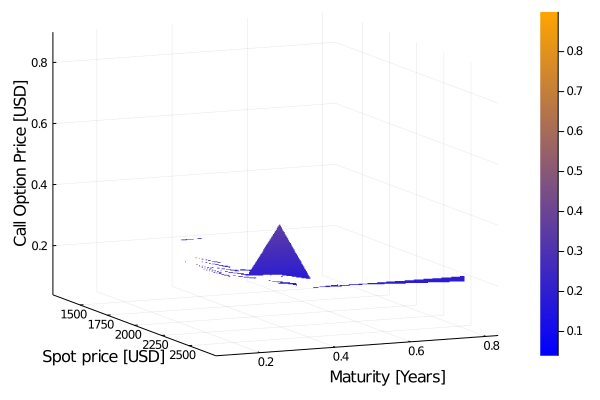

In [20]:
Plots.plot(Strikes, T[2:length(T)], replace(impv_mat, missing=>NaN),st=:surface,color=my_cg, camera=(60,30), xlabel="Spot price [USD]", ylabel="Maturity [Years]", zlabel="Call Option Price [USD]")

In [21]:
impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].Strike)) for i in 1:length(CALLS)]
for j in 1:length(CALLS)
    impv_real[j] = CALLS[j]."Implied Volatility" / 100
end

impv_mat_real = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS))
for i in 1:length(CALLS)
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(CALLS[i].Strike)
            if CALLS[i].Strike[k] == Strikes[j]
                a = k
                break
            end
        end
        impv_mat_real[j,i] = a == -1 ? missing : impv_real[i][a]
    end
end

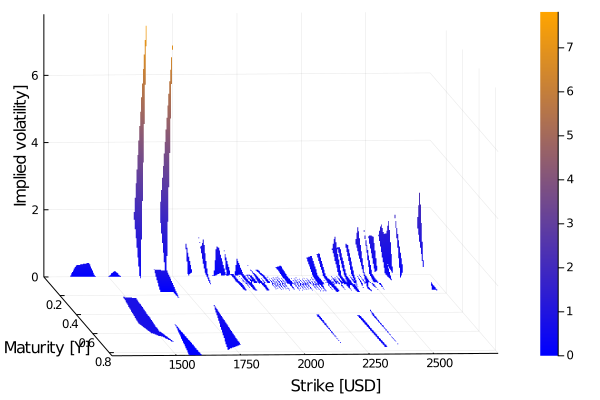

In [22]:
Plots.plot(T, Strikes, impv_mat_real,st=:surface,color=my_cg, camera=(80,30), xlabel="Maturity [Y]", ylabel="Strike [USD]", zlabel="Implied volatility]")

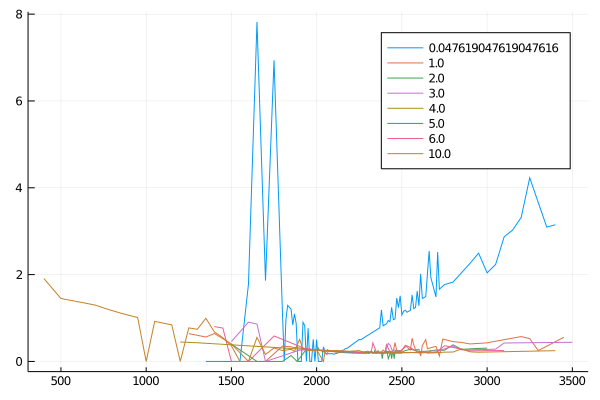

In [23]:
a = Plots.plot(CALLS[1].Strike, replace(impv_real[1], missing=>NaN), label=string(T[1]*12))
for i in 2:length(CALLS)
    Plots.plot!(CALLS[i].Strike, replace(impv_real[i], missing=>NaN), label=string(T[i]*12))
end
display(a)

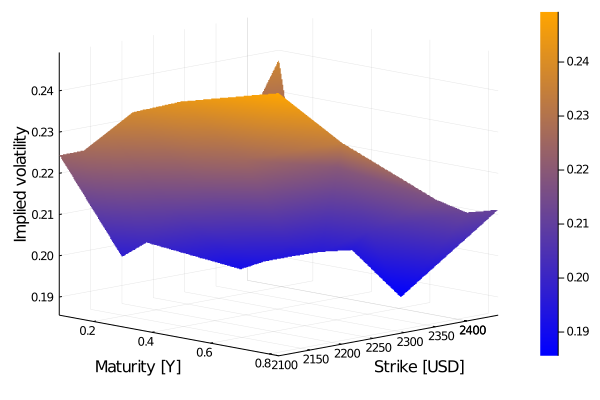

In [24]:
x = [CALLS[i].Strike for i in 1:length(CALLS)]
Strikes = intersect(x[2], x[3], x[4], x[5],  x[7], x[8])

deleteat!(CALLS, 1)
deleteat!(CALLS, 5)

impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].Strike)) for i in 1:length(CALLS)]
for j in 1:length(CALLS)
    impv_real[j] = CALLS[j]."Implied Volatility" / 100
end

impv_mat_real = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS))
for i in 1:length(CALLS)
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(CALLS[i].Strike)
            if CALLS[i].Strike[k] == Strikes[j]
                a = k
                break
            end
        end
        impv_mat_real[j,i] = a == -1 ? missing : impv_real[i][a]
    end
end

Plots.plot(T[vcat(2:5, 7:8)], Strikes, impv_mat_real,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Y]", ylabel="Strike [USD]", zlabel="Implied volatility")

In [25]:
RUT = yf.Ticker("^RUT")
expr = RUT.options
#opt = [RUT.option_chain(expr[i]) for i in 1:length(expr)]

#for (i, x) in enumerate(opt)
#    x[1].to_csv("DATA_yf/CALL_"*expr[i]*".csv")
#end

#RUT.history(period="5y").to_csv("DATA_yf/Stock.csv")

("2022-04-04", "2022-04-06", "2022-04-08", "2022-04-11", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-06", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31", "2022-09-16", "2022-09-30", "2022-12-16", "2022-12-30", "2023-03-17", "2023-06-16", "2023-12-15", "2024-12-20")

In [26]:
CALLS = [DataFrame(CSV.File("DATA_yf/CALL_"*x*".csv")) for x in expr]
function Mid_Price( df )
    df[!,:Mid_Price] = ( df.ask .+ df.bid ) ./ 2
end

for i in 1:length(CALLS)
    Mid_Price(CALLS[i])
end

In [27]:
today = Date("2022-03-31") # Dates.today()

T = [bdayscount(:USSettlement, today, Date(x)) / 252 for x in expr]
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].strike)
end
#Strikes .= clamp.(Strikes, 1950, 2150) 
Strikes = sort(unique(Strikes))

202-element Vector{Any}:
  400.0
  500.0
  700.0
  750.0
  800.0
  850.0
  900.0
  950.0
 1000.0
 1050.0
 1100.0
 1150.0
 1200.0
    ⋮
 2950.0
 3000.0
 3050.0
 3100.0
 3150.0
 3200.0
 3250.0
 3300.0
 3350.0
 3400.0
 3450.0
 3500.0

In [28]:
x = [CALLS[i].strike for i in 1:length(CALLS)]
mat = vcat(3, 5:7, 9:11,  18, 22)
Strikes = intersect( x[3], x[5], x[6], x[7], x[9],x[10], x[11], x[18], x[22])


10-element Vector{Float64}:
 1500.0
 1950.0
 2000.0
 2050.0
 2100.0
 2150.0
 2200.0
 2250.0
 2300.0
 2350.0

In [29]:
impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS[mat])]
for (j, call) in enumerate(CALLS[mat])
    impv_real[j] = call.impliedVolatility
end
print(Strikes)
impv_mat_real = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS[mat]))
for (i, call) in enumerate(CALLS[mat])
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(call.strike)
            if call.strike[k] == Strikes[j]
                a = k
                #break
            end
        end
        impv_mat_real[j,i] = a == -1 ? missing : impv_real[i][a]
    end
end

[1500.0, 1950.0, 2000.0, 2050.0, 2100.0, 2150.0, 2200.0, 2250.0, 2300.0, 2350.0]

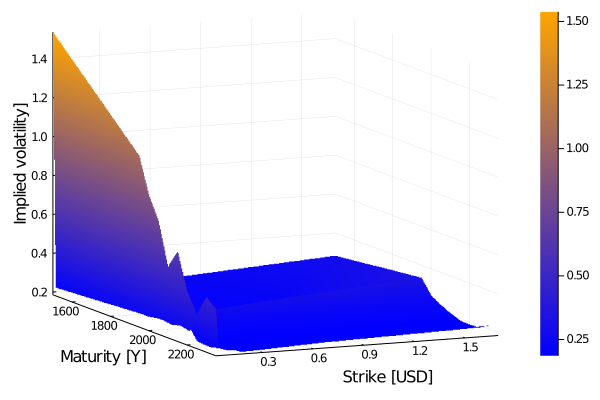

In [30]:
Plots.plot(Strikes, T[mat], impv_mat_real,st=:surface,color=my_cg, camera=(60,30), xlabel="Maturity [Y]", ylabel="Strike [USD]", zlabel="Implied volatility]")

In [31]:
#CSV.write("prova1.csv", Tables.table(impv_mat_real), writeheader=false)

In [32]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Call option price [USD]",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=Strikes,
        y=T[mat],
        z=impv_mat_real,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

data: [
  "surface with fields contours, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [33]:
for c in CALLS
    for (i,x) in enumerate(c.impliedVolatility)
        if x < 0.1 
            print("ok")
            delete!(c, i)
        end
        if c.volume[i] === missing 
            print("ok")
            delete!(c, i)
        end
    end
end
Strikes = [CALLS[i].strike for i in 1:length(CALLS)]

impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS)]
for (j, call) in enumerate(CALLS)
    impv_real[j] = call.impliedVolatility / 100
end


okokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokok

In [34]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Call option price [USD]",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

plots = [PlotlyJS.scatter(x=CALLS[i].strike, y=repeat([T[i]], length(impv_real[i])), z=impv_real[i], type="scatter3d", mode="lines", line=attr(color="limegreen", width=15)) for i in 1:length(impv_real)]

PlotlyJS.plot(plots,layout)

data: [
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z",
  "scatter3d with fields line, mode, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [35]:
STOCK = DataFrame(CSV.File("DATA_yf/Stock.csv"))
p = PlotlyJS.plot(candlestick(x    =STOCK[!, "Date" ],
                              open =STOCK[!, "Open" ],
                              high =STOCK[!, "High" ],
                              low  =STOCK[!, "Low"  ],
                              close=STOCK[!, "Close"] ),
                  Layout(title="RUT stock Prices",
                         yaxis_title="RUT Stock [USD]")
    )

data: [
  "candlestick with fields close, high, low, open, type, and x"
]

layout: "layout with fields margin, template, title, and yaxis"

In [36]:
Year_Days = 252

function Return( df )
    df[!,:Return    ] =     ( df.Close - lag(df.Close, 1) ) ./ lag(df.Close, 1)
    df[!,:Return_LOG] = log.( df.Close                      ./ lag(df.Close, 1) )
end

Return( STOCK )

function Volatility( Returns, T, daily = false )
    T = floor(Int,T)
    VOL_DAILY  = std(skipmissing(Returns[length(Returns)-T:length(Returns)]))
    VOL_ANNUAL = VOL_DAILY * sqrt(Year_Days)
    if daily==false
        return VOL_ANNUAL
    end
    return VOL_DAILY, VOL_ANNUAL
end

VOL_ANNUAL = [Volatility( STOCK.Return, i*Year_Days ) for i in T]
S0         = STOCK.Close[length(STOCK.Close)]

2091.110107421875

In [82]:
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].strike)
end
#Strikes .= clamp.(Strikes, 1250, 2750) 
Strikes = sort(unique(Strikes))
#Strikes = collect(1250:50:2500)

191-element Vector{Any}:
  500.0
  750.0
  850.0
  900.0
  950.0
 1000.0
 1050.0
 1100.0
 1150.0
 1200.0
 1250.0
 1300.0
 1350.0
    ⋮
 2900.0
 2950.0
 3000.0
 3050.0
 3100.0
 3150.0
 3200.0
 3250.0
 3300.0
 3350.0
 3400.0
 3450.0

In [105]:
r = [.0032814,.0032814,.0032814,.0032814,.0032814,.0032814, .0045514,.0045514,.0045514,.0045514,
     .00711,.00711,.00711, .0096686, .0113524, .0113524, .0130362,.0130362, .0147200,.0147200, .0179893, .0179893, .0179893]

opt_price = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_delta = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_gamma = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_theta = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_vega  = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_impv  = Array{Union{Missing, Float64}}(undef, length(CALLS), length(Strikes))
for (i, c) in enumerate(CALLS)
    for (j,k) in enumerate(Strikes)
        opt_price[i, j] = blsprice(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_delta[i, j] = blsdelta(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_gamma[i, j] = blsgamma(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_theta[i, j] = blstheta(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_vega[ i, j] = blsvega( S0, k, r[i], T[i], VOL_ANNUAL[i])
        try
            opt_impv[ i, j] = blsimpv( S0, k, r[i], T[i], opt_price[i,j])
        catch y
            opt_impv[ i, j] = missing
        end
    end
end

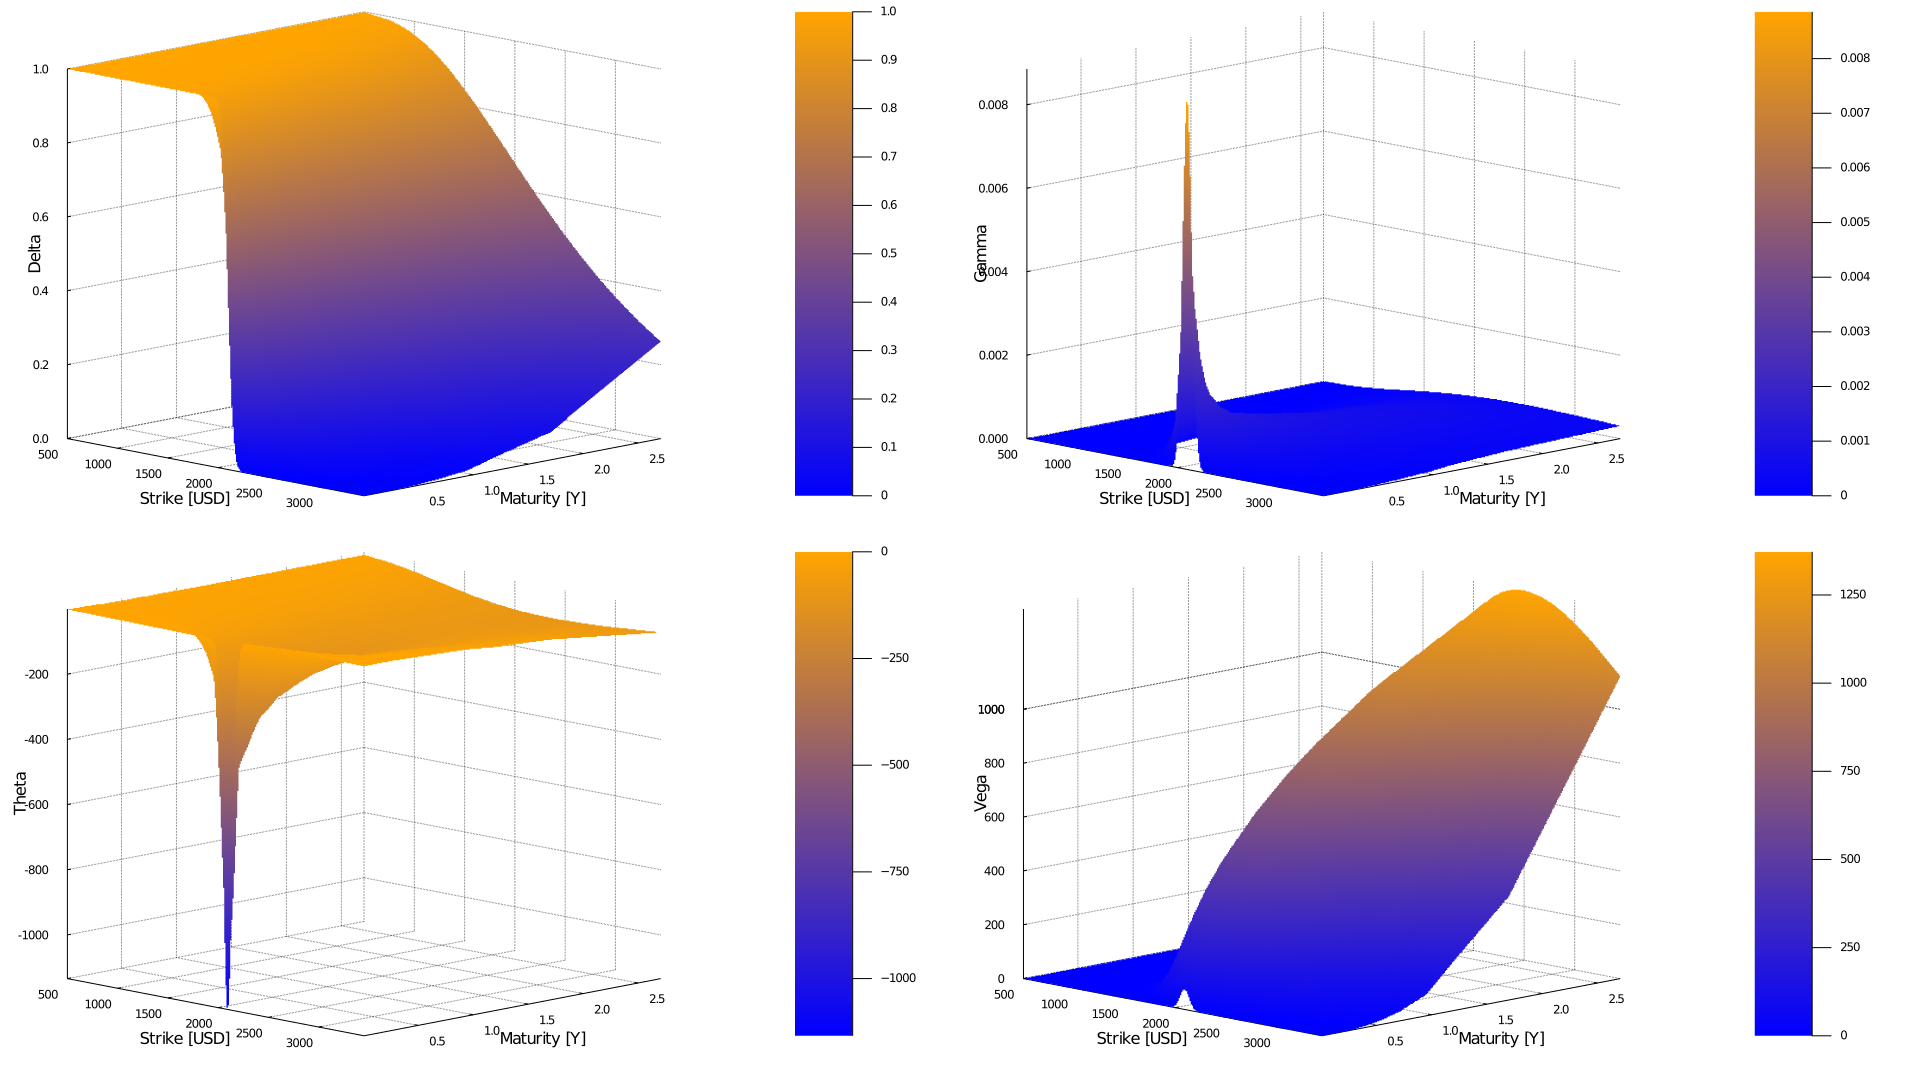

In [108]:
price = Plots.plot(Strikes,T,opt_price,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Price [USD]")
delta = Plots.plot(Strikes,T,opt_delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Delta")
gamma = Plots.plot(Strikes,T,opt_gamma,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Gamma")
theta = Plots.plot(Strikes,T,opt_theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Theta")
vega  = Plots.plot(Strikes,T,opt_vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Vega")
pimpv = Plots.plot(Strikes,T,opt_impv, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Implied VOlatility")


l = @layout [
    a b
    c d e
]
Plots.plot(  delta, gamma, theta, vega, layout = (2, 2), size = (1920, 1080))
#price,
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)

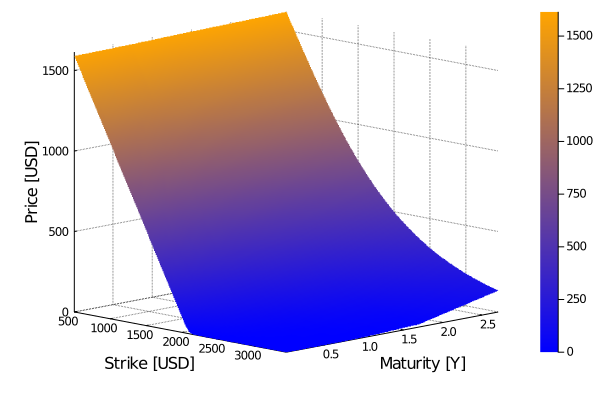

In [107]:
Plots.plot(  price )

Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)

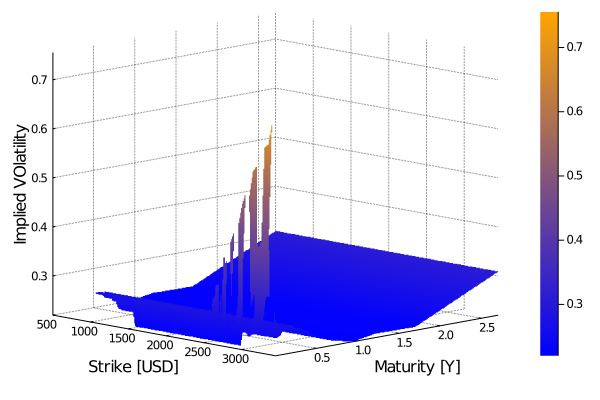

In [110]:
Plots.plot(  pimpv )

Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)

In [ ]:
layout = PlotlyJS.Layout(
    title="Call option price surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Call option price [USD]",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=Strikes,
        z=price,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Delta surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Delta",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=delta,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Gamma surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Gamma",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=gamma,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Theta surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Theta",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=theta,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Vega surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Vega",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=vega,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Rho surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Rho",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=rho,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
K = 100
r = .01
vol = 0.3

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

In [ ]:
Plots.plot(T, S, delta,color=my_cg,st=:surface,camera=(45,45))

In [ ]:

Plots.plot(T, S, gamma,color=my_cg,st=:surface,camera=(45,20))